In [3]:
import sys, os
import numpy as np
import keras
import csv
import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU
from keras.layers.convolutional import Convolution2D, Cropping2D

import matplotlib.pyplot as plt

from model import *

get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.titlesize'] = 8

get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

Using TensorFlow backend.


In [4]:
from train import *
from generator import validation_generator
from generator import training_generator

data = pd.read_csv("data/driving_log.csv")


uint8
(80, 320, 3)


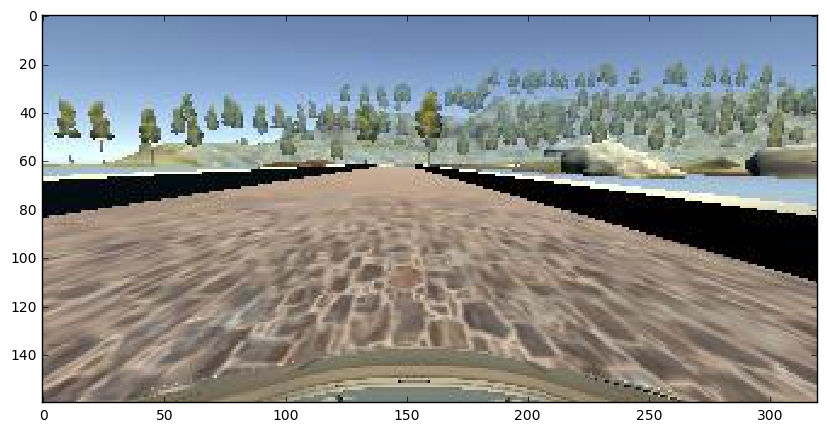

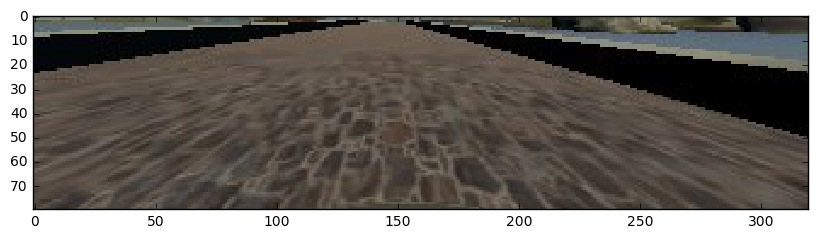

In [15]:
from preprocess import prepareTrain, prepareTest, roi, brightness, gray_diff_images

file = os.path.join(conf.data_folder, data['center'].iloc[100].strip())
img = cv2.imread(file)

steering = data['steering'].iloc[0]

X = roi(brightness(img))

print (img.dtype)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(X)

print (X.shape)

(64, 64, 3)


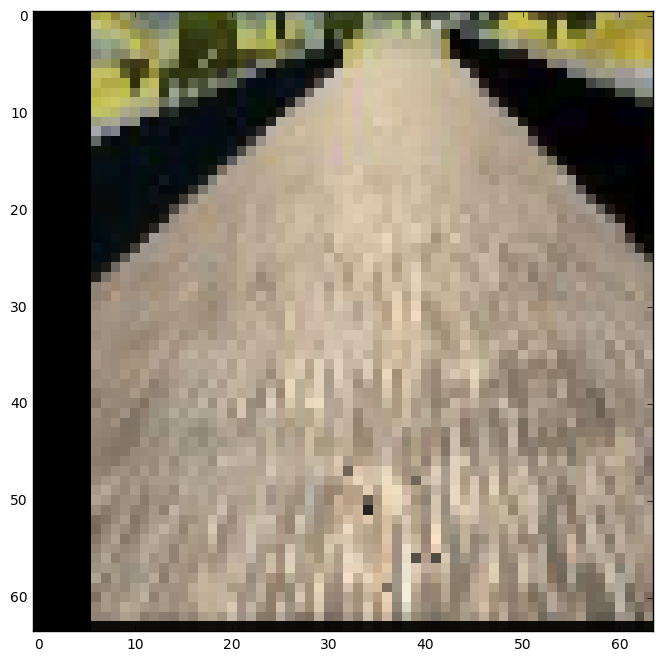

In [29]:
X, y = prepareTrain(img, steering)

print (X.shape)

plt.imshow(X)

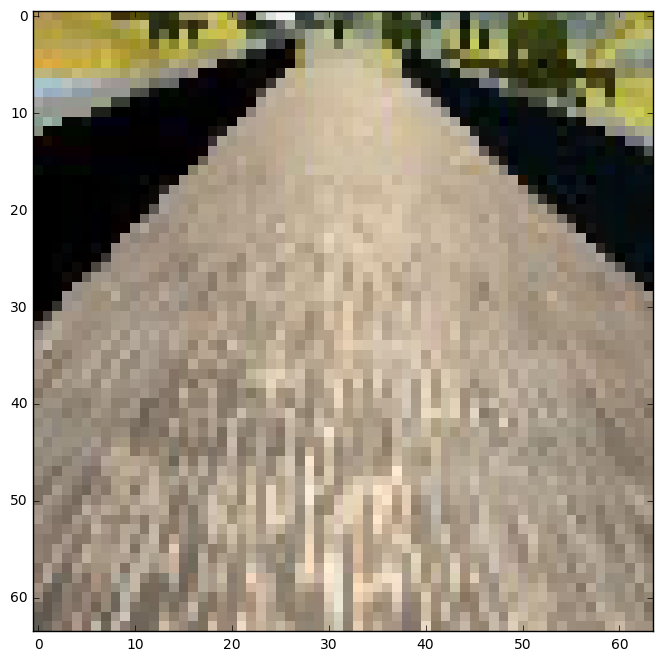

In [25]:

X, y = prepareTest(img, steering)
plt.imshow(X)

1.0 8036


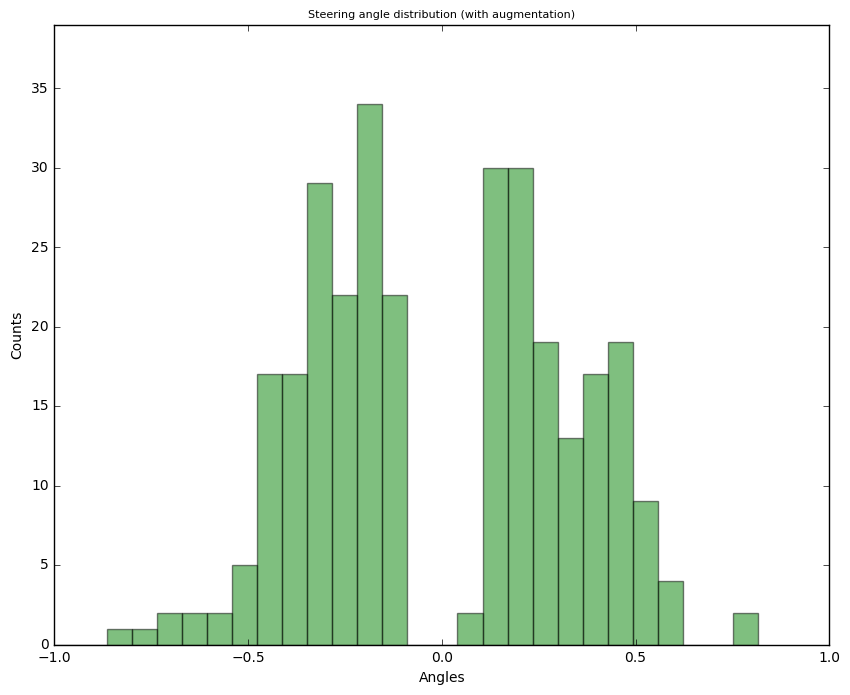

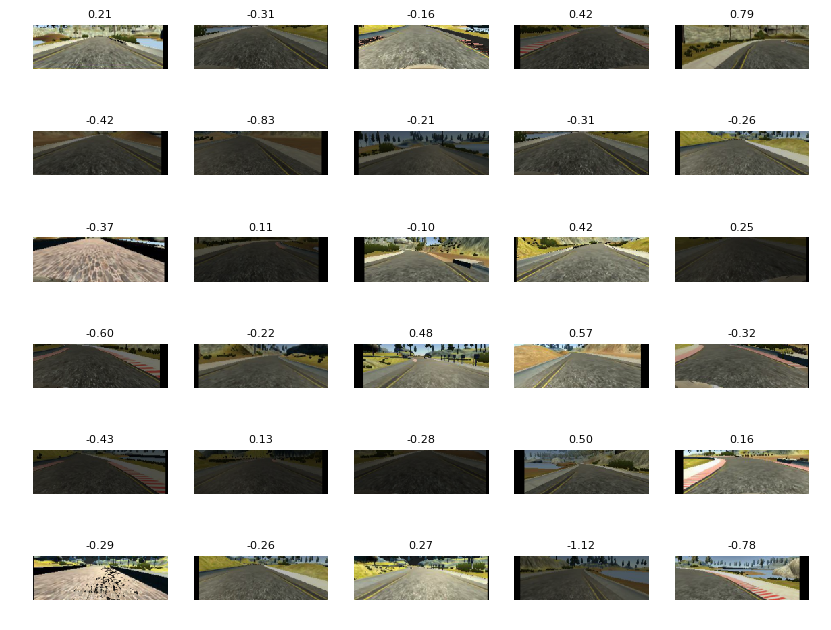

In [12]:
bias = 1.0
train_X, train_y = next(training_generator(data, bias, 300))
    
plt.figure()
n, bins, _ = plt.hist(train_y, 30, facecolor='green', alpha=0.5)
plt.plot(bins)
plt.title('Steering angle distribution (with augmentation)')
plt.xlabel('Angles')
plt.ylabel('Counts')
plt.axis([-1, 1, 0, max(n)+5])

plt.show()
    
bias = 1. / (i + 1.)

plt.figure()
idxs = np.random.choice(train_X.shape[0], 30)
for i in range(len(idxs)):
    img = train_X[idxs[i]]
    plt.subplot(6, 5, i+1)
    plt.imshow(img.astype(np.uint8))
    plt.axis("off")
    plt.title("%0.2f"%(train_y[idxs[i]]))



1.0 8036
0.25 8036


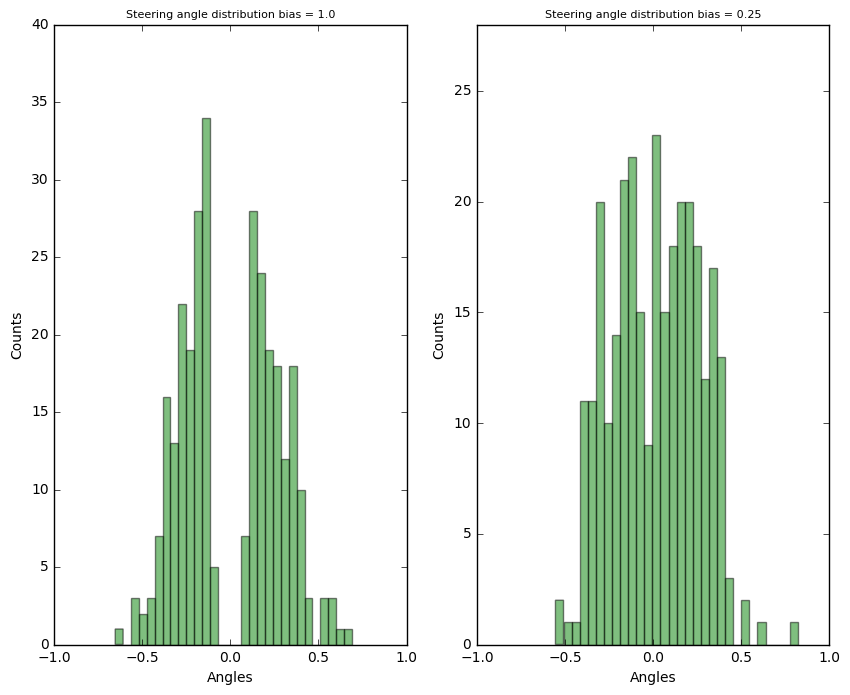

In [63]:
bias = 1.0
_, train_y = next(training_generator(data, bias, 300))
    

plt.subplot(121)
n, bins, _ = plt.hist(train_y, 30, facecolor='green', alpha=0.5)
plt.title('Steering angle distribution bias = 1.0')
plt.xlabel('Angles')
plt.ylabel('Counts')
plt.axis([-1, 1, 0, 40])

bias = 1. / (3. + 1.)
_, train_y = next(training_generator(data, bias, 300))
plt.subplot(122)
n, bins, _ = plt.hist(train_y, 30, facecolor='green', alpha=0.5)

plt.title('Steering angle distribution bias = %0.2f' % bias)
plt.xlabel('Angles')
plt.ylabel('Counts')
plt.axis([-1, 1, 0, max(n)+5])

plt.savefig('angle_dist_balance.png')

In [23]:
images = gray_diff_images(data)

In [27]:
image_data = images[0]
steering_data = images[1]


(8030, 160, 320, 4)


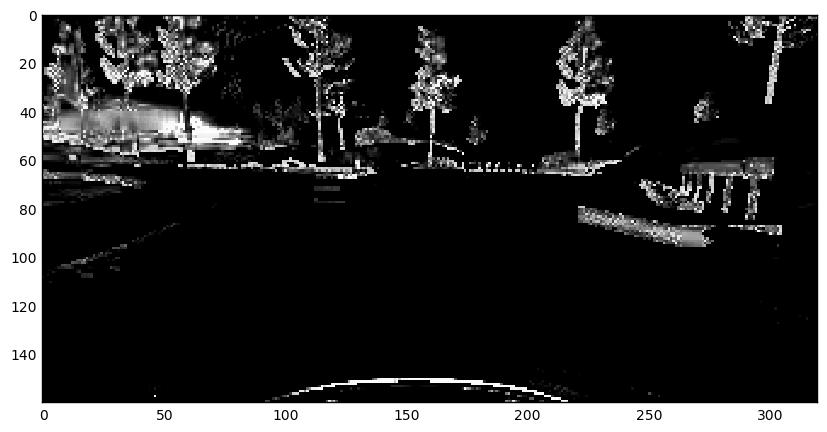

In [34]:
print (image_data.shape)
plt.imshow(image_data[0, :, :, 2], cmap='gray')